Goal: To build a model that will help to pick the region with the highest profit margin. 
        To analyze potential profit and risks using the Bootstrapping technique.

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df0 = pd.read_csv()
df1 = pd.read_csv()
df2 = pd.read_csv()


In [2]:
df0.dtypes

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

Displaying the datatypes of the columns in the data.

In [3]:
df0_train, df0_valid = train_test_split(df0, test_size=0.25, random_state=12345)
df1_train, df1_valid = train_test_split(df1, test_size=0.25, random_state=12345)
df2_train, df2_valid = train_test_split(df2, test_size=0.25, random_state=12345)

Splitting the datasets into train and valid datasets.

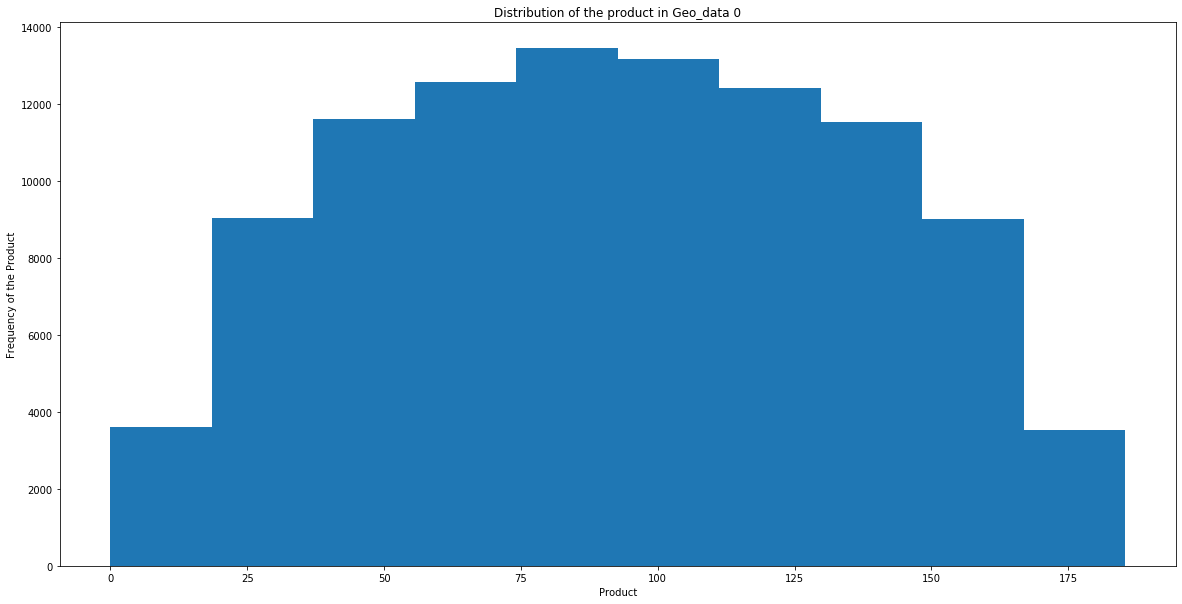

In [4]:
target0 = df0['product']
plt.figure(figsize=(20,10))
plt.hist(target0)
plt.title('Distribution of the product in Geo_data 0')
plt.xlabel('Product')
plt.ylabel('Frequency of the Product')
plt.show()

Geo_data 0 has a normal distribution i.e the majority of the product are concentrated around the centre.

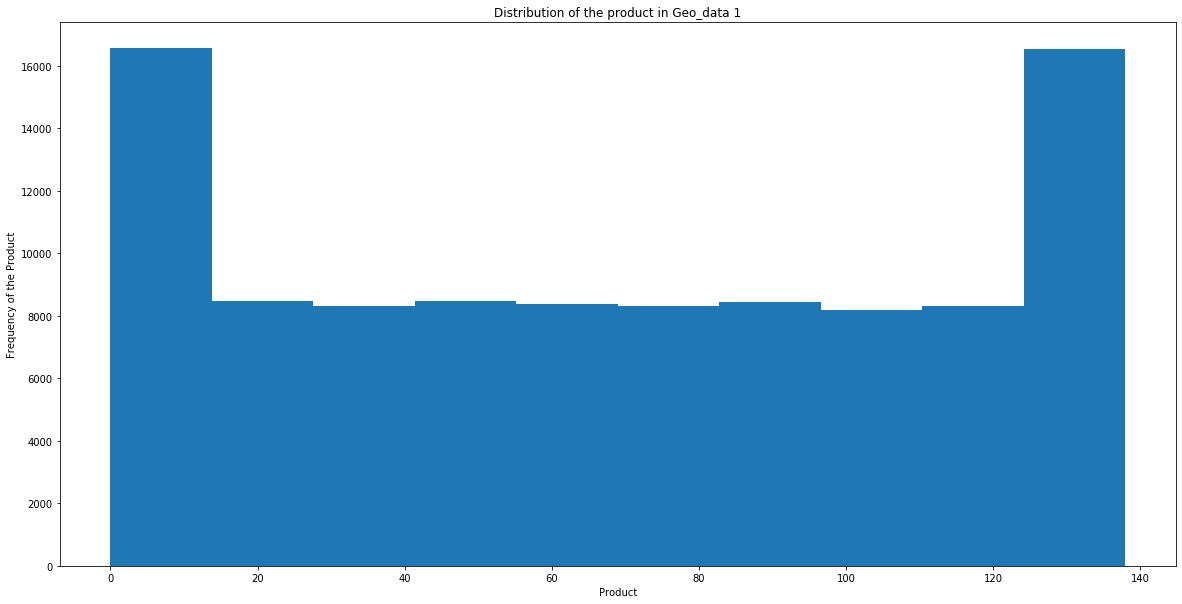

In [5]:
target1 = df1['product']
plt.figure(figsize=(20,10))
plt.hist(target1)
plt.title('Distribution of the product in Geo_data 1')
plt.xlabel('Product')
plt.ylabel('Frequency of the Product')
plt.show()

Geo_data 1 region does not have a normal distribution. Most values are concentrated around 0-10 and around 130 - 140.

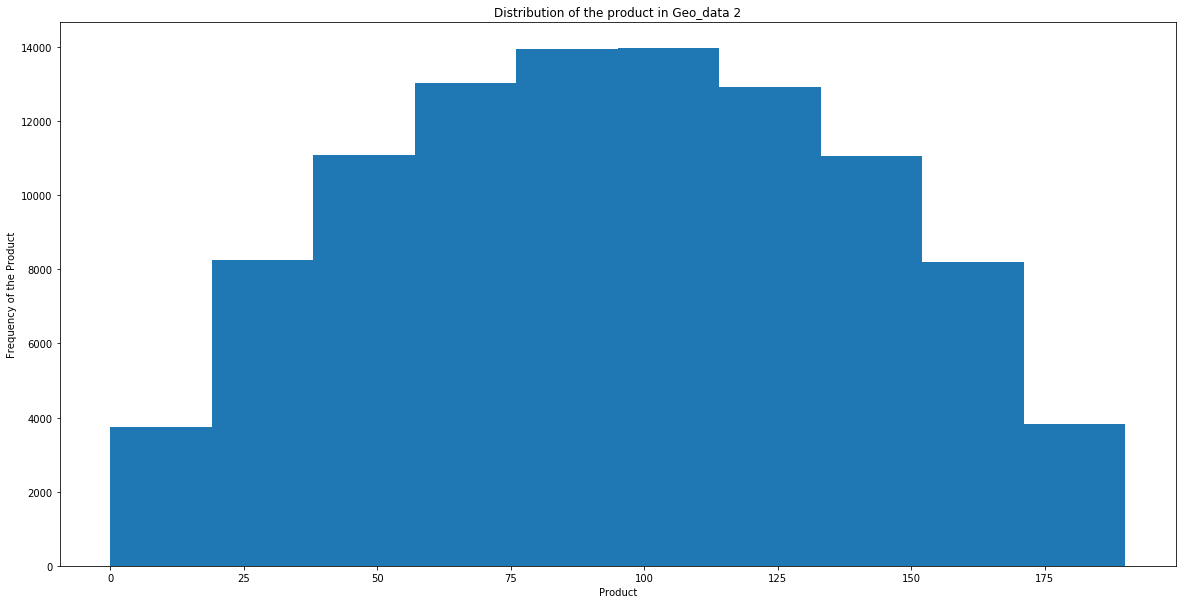

In [6]:
target2 = df2['product']
plt.figure(figsize=(20,10))
plt.hist(target2)
plt.title('Distribution of the product in Geo_data 2')
plt.xlabel('Product')
plt.ylabel('Frequency of the Product')
plt.show()

Geo_data 2 region has a normal distribution.

Fitting the model for Geo data 0.

In [7]:
features0_train = df0_train.drop(['id','product'], axis=1)
target0_train = df0_train['product']

features0_valid = df0_valid.drop(['id','product'], axis=1)
target0_valid = df0_valid['product']

predictions = pd.Series(target0_valid.mean(), index=target0_valid.index)
rmse = mean_squared_error(target0_valid, predictions)**0.5

print('rmse for geo data 0  after training = '+"{:.3}".format(rmse))


rmse for geo data 0  after training = 44.3


In [8]:
regressor = LinearRegression()

regressor.fit(features0_train,target0_train)
predictions_train = regressor.predict(features0_train)
predictions_valid = regressor.predict(features0_valid)

rmse = mean_squared_error(target0_valid, predictions_valid)**0.5

print('rmse for geo data 0 after validation = '+"{:.3}".format(rmse))

rmse for geo data 0 after validation = 37.6


I wonder how to loop linear regression since it does not have hyperparameters to tune.

Fitting the model for Geo data 1.

In [9]:
features1_train = df1_train.drop(['id','product'], axis=1)
target1_train = df1_train['product']

features1_valid = df1_valid.drop(['id','product'], axis=1)
target1_valid = df1_valid['product']

predictions = pd.Series(target1_valid.mean(), index=target1_valid.index)
rmse = mean_squared_error(target1_valid, predictions)**0.5

print('rmse for geo data 1  after training = '+"{:.3}".format(rmse))


rmse for geo data 1  after training = 46.0


In [10]:
regressor = LinearRegression()

regressor.fit(features1_train,target1_train)
predictions_train = regressor.predict(features1_train)
predictions_valid = regressor.predict(features1_valid)

rmse = mean_squared_error(target1_valid, predictions_valid)**0.5

print('rmse for geo data 1 after validation = '+"{:.3}".format(rmse))

rmse for geo data 1 after validation = 0.893


Fitting the model for Geo data 2.

In [11]:
features2_train = df2_train.drop(['id','product'], axis=1)
target2_train = df2_train['product']

features2_valid = df2_valid.drop(['id','product'], axis=1)
target2_valid = df2_valid['product']

predictions = pd.Series(target2_valid.mean(), index=target2_valid.index)
rmse = mean_squared_error(target2_valid, predictions)**0.5

print('rmse for geo data 2 after training = '+"{:.3}".format(rmse))


rmse for geo data 2 after training = 44.9


In [12]:
regressor = LinearRegression()

regressor.fit(features2_train,target2_train)
predictions_train = regressor.predict(features2_train)
predictions_valid = regressor.predict(features2_valid)

rmse = mean_squared_error(target2_valid, predictions_valid)**0.5

print('rmse for geo data 2 after validation = '+"{:.3}".format(rmse))

rmse for geo data 2 after validation = 40.0


The RMSE for the third dataset is much higher than for the other two datasets. It shows that geo_data 2 has the highest produce.

In [13]:
BUDGET = 10000
POINTS_PER_BUDGET = 200
PRODUCT_PRICE = 0.45
PRODUCT_QUANTITY_FOR_0_PROFIT = (BUDGET/POINTS_PER_BUDGET) / PRODUCT_PRICE

PRODUCT_QUANTITY_FOR_0_PROFIT

111.11111111111111

For Geo_data 2 the difference between the sample mean and the actual mean is so high than for the other 2 datasets.

Getting the best 200 using Linear Regression.

In [14]:
rmse = mean_squared_error(target0_valid, predictions)**0.5

regressor.fit(features0_train,target0_train)

regressor = LinearRegression()
regressor.fit(features0_train, target0_train,200)
predictions0_valid = regressor.predict(features0_valid)
predictions0_train = regressor.predict(features0_train)
       

RMSE_train0 = mean_squared_error(target0_train, predictions0_train)**0.5
RMSE_valid0 = mean_squared_error(target0_valid, predictions0_valid)**0.5


In [15]:
print("The well with the Highest Value in Geo data 0")
print("Training set:", RMSE_train0)
print("Validation set:", RMSE_valid0)

The well with the Highest Value in Geo data 0
Training set: 37.72999219904026
Validation set: 37.5794217150813


In [16]:
rmse = mean_squared_error(target1_valid, predictions)**0.5

regressor.fit(features1_train,target1_train)

regressor = LinearRegression()
regressor.fit(features1_train, target1_train,200)
predictions1_valid = regressor.predict(features1_valid)
predictions1_train = regressor.predict(features1_train)
       

RMSE_train1 = mean_squared_error(target1_train, predictions1_train)**0.5
RMSE_valid1 = mean_squared_error(target1_valid, predictions1_valid)**0.5


In [17]:
print("The well with the Highest Value in Geo data 1")
print("Training set:", RMSE_train1)
print("Validation set:", RMSE_valid1)


The well with the Highest Value in Geo data 1
Training set: 0.8894720773917375
Validation set: 0.893099286775616


In [18]:
rmse = mean_squared_error(target2_valid, predictions)**0.5

regressor.fit(features2_train,target2_train)

regressor = LinearRegression()
regressor.fit(features2_train, target2_train,200)
predictions2_valid = regressor.predict(features2_valid)
predictions2_train = regressor.predict(features2_train)
       

RMSE_train2 = mean_squared_error(target2_train, predictions2_train)**0.5
RMSE_valid2 = mean_squared_error(target2_valid, predictions2_valid)**0.5


In [19]:
print("The well with the Highest Value in Geo data 2")
print("Training set:", RMSE_train2)
print("Validation set:", RMSE_valid2)


The well with the Highest Value in Geo data 2
Training set: 40.064259788323845
Validation set: 40.02970873393434


Geo data 2 has the highest RMSE while Geo_data 1 has the lowest RMSE after fitting the model to the vaidation data.

In [20]:
regressor = LinearRegression()
regressor.fit(features0_train, target0_train)
predictions0_valid = pd.Series(regressor.predict(features0_valid), index=target0_valid.index)
 
 
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:POINTS_PER_BUDGET]
    product = selected_points.sum()
    revenue = product * PRODUCT_PRICE
    cost = BUDGET
    return revenue - cost
 
values = []
state = np.random.RandomState(57)
for i in range(1000):
    target0_subsample = target0_valid.sample(n=500, replace=True, random_state=state)
    preds_subsample = predictions0_valid.loc[target0_subsample.index]
    values.append(profit(target0_subsample, preds_subsample))
 
values = pd.Series(values)
 
mean = values.mean()
print("Average profit:", mean)
print("risk:", np.mean(values < 0) * 100, '%')
print("95% Confidence interval:", values.quantile(0.025), values.quantile(0.975))

Average profit: 396.3469814040483
risk: 8.6 %
95% Confidence interval: -147.1038161499589 938.9266612619164


Calculating the Profit, Risk and the Confidence interval for geo_data 0. 

In [21]:
regressor = LinearRegression()
regressor.fit(features1_train, target1_train)
predictions1_valid = pd.Series(regressor.predict(features1_valid), index=target1_valid.index)
 
 
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:POINTS_PER_BUDGET]
    product = selected_points.sum()
    revenue = product * PRODUCT_PRICE
    cost = BUDGET
    return revenue - cost
 
values = []
for i in range(1000):
    target1_subsample = target1_valid.sample(n=500, replace=True, random_state=state)
    preds_subsample = predictions1_valid.loc[target1_subsample.index]
    values.append(profit(target1_subsample, preds_subsample))
 
values = pd.Series(values)
 
mean = values.mean()
print("Average profit:", mean)
print("risk:", np.mean(values < 0) * 100, '%')
print("95% Confidence interval:", values.quantile(0.025), values.quantile(0.975))

Average profit: 503.4087237343344
risk: 1.2 %
95% Confidence interval: 67.32755951673403 921.5349731157772


Calculating the Profit, Risk and the Confidence interval for geo_data 1. 

In [22]:
regressor = LinearRegression()
regressor.fit(features2_train, target2_train)
predictions2_valid = pd.Series(regressor.predict(features2_valid), index=target2_valid.index)
 
 
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:POINTS_PER_BUDGET]
    product = selected_points.sum()
    revenue = product * PRODUCT_PRICE
    cost = BUDGET
    return revenue - cost
 
values = []
for i in range(1000):
    target2_subsample = target2_valid.sample(n=500, replace=True, random_state=state)
    preds_subsample = predictions2_valid.loc[target2_subsample.index]
    values.append(profit(target2_subsample, preds_subsample))
 
values = pd.Series(values)
 
mean = values.mean()
print("Average profit:", mean)
print("risk:", np.mean(values < 0) * 100, '%')
print("95% Confidence interval:", values.quantile(0.025), values.quantile(0.975))

Average profit: 412.8691255373605
risk: 7.1 %
95% Confidence interval: -142.00590155369613 948.3207566194251


Calculating the Profit, Risk and the Confidence interval for geo_data 2. 

Conclusion: Geo_data_2 is to be preferred. Geo_data_0 and 2 each has a normal distribution.Geo_data 2 has a higher rmse than Geo_data_0. Geo_data_1 has a higher profit and a lower risk than Geo_data_2, though the Profit for Geo_data_2 is higher than for Geo_data_0 and Geo_data_2 has lower risk than Geo_data_0.